# LGE - SNU AI Scientist 고급과정 [확률통계 및 통계 방법론]
## 3장: 표본과 경험적 분포
### TA: 홍현경(hyungyeong81@snu.ac.kr)

# 1. 표본분포(Sampling Distribution)


## 1.1 표본분포 복습
- 표본분포는 표본이 지니는 불확실성을 수학적으로 표현한 개념이다.
- 확률적으로 추출된 표본으로부터 계산한 통계량(평균, 분산, 비율 등)이 가질 수 있는 값들의 확률분포를 의미한다.
- 표본은 임의로 추출되므로, 추출 이전에는 어떤 표본이 선택될지 알 수 없으며 추출할 때마다 서로 다른 관측값이 나타난다.
- 따라서 표본으로부터 계산한 통계량 역시 표본에 따라 달라지는 확률변수가 된다.
- 동일한 추출 과정을 반복하면 통계량은 일정한 확률적 패턴을 보이며, 이때 통계량이 따르는 분포를 표본분포라고 한다.

## 1.2 경험적분포 복습
- 한편, 하나의 표본에 포함된 관측값들의 분포를 경험적 분포(empirical distribution)라고 한다.
- 표본의 크기가 증가할수록 경험적 분포는 모집단의 분포에 점점 가까워진다.
- 즉, 표본 수가 충분히 크면 표본으로부터 얻은 경험적 분포는 모집단 분포에 대한 좋은 근사가 된다.

(경험적분포 실습)

- 이 실습에서는 전체 사용자가 매우 많은 온라인 서비스에서, 일부 사용자만을 표본으로 추출하여 알림 서비스를 활성화한 사용자의 비율을 추정하는 상황을 가정한다.
- 모집단은 총 10,000명의 사용자로 구성되어 있으며, 이 중 30%는 알림 서비스를 활성화한 사용자이다.
- 모집단 전체를 조사하지 않고, 무작위로 100명의 사용자를 추출하여
  기능 활성화 비율(표본비율)을 계산한다.
- 이 과정을 B번 반복하여 얻은 표본비율들의 분포를
  표본비율의 경험적 분포로 해석한다.
- 이를 통해 표본 크기가 고정된 상태에서 표본비율이
  어떤 확률적인 변동성을 가지는지 모의실험을 통해 확인한다.

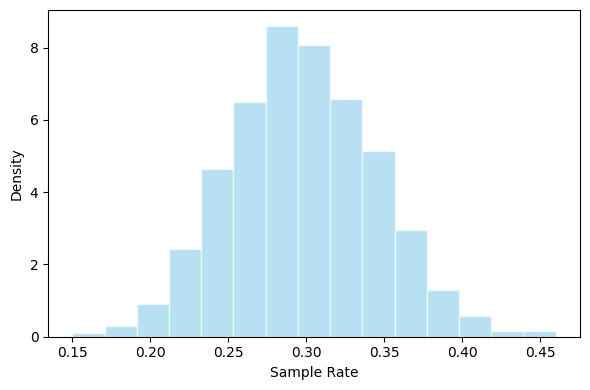

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(2026)

# (모집단 생성) 1: 기능 활성화 사용자, 0: 비활성 사용자
population = np.concatenate((np.ones(3000), np.zeros(7000)), axis=0)
np.mean(population)

# 모의실험 환경 설정
B = 1000 # 모의실험 반복 횟수
n = 100 # 표본 크기
simulation_sample_rate = pd.DataFrame({'sample_rate': np.zeros(B)})

# 표본비율 계산
for i in range(B):
    sample = np.random.choice(population, n, replace=False)
    simulation_sample_rate.loc[i, 'sample_rate'] = np.mean(sample)

# 표본비율의 경험적 분포 시각화
plt.figure(figsize=(6, 4))

plt.hist(simulation_sample_rate["sample_rate"],
         bins=15,
         density=True,
         alpha=0.6,
         color = 'skyblue',
         edgecolor="white")

plt.xlabel("Sample Rate")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

# 2. 큰 수의 법칙(LLN: Law of Large Numbers)

$X_1, X_2, \cdots, X_n$이 평균이 $\mu$이고 분산이 $\sigma^2$인 모집단에서 추출한 랜덤표본이라고 하자.

- $E(\bar{X}) = \mu$: 표본평균의 기댓값은 모평균과 같다.
- $Var(\bar{X}) = \dfrac{\sigma^2}{n} \rightarrow 0 \quad \text{as } n \rightarrow \infty$: 표본의 크기 $n$이 커질수록 표본평균의 분산은 0에 가까워진다.

$$
\therefore \ \bar{X} \rightarrow \mu \quad \text{as } n \rightarrow \infty
\quad
$$

즉, 표본평균($\bar X$)이 모평균($\mu$)으로 수렴한다.

(큰 수의 법칙 실습 1)

한 기업은 신규 서비스를 출시한 후, 고객을 대상으로 만족도 설문조사를 실시하고 있다. 설문 문항은 0점부터 20점까지의 점수로 응답하도록 되어 있다고 하자.

임의로 선택한 한 명의 고객 만족도 점수를 확률변수 $X$라 하자. 각 고객의 응답은 서로 독립이고, 모집단에서의 평균 만족도는 $\mu=10$, 표준편차는 $15$라고 알려져 있다.

마케팅 팀은 설문 응답 수가 증가할수록 만족도가 어떠한 값으로 수렴하는지를 확인하고자 한다.

다음 코드는 설문 응답자 수 $n=1,2,\dots,1000$에 대해 매번 만족도의 표본평균을 계산하고 이를 시각화한 것이다.

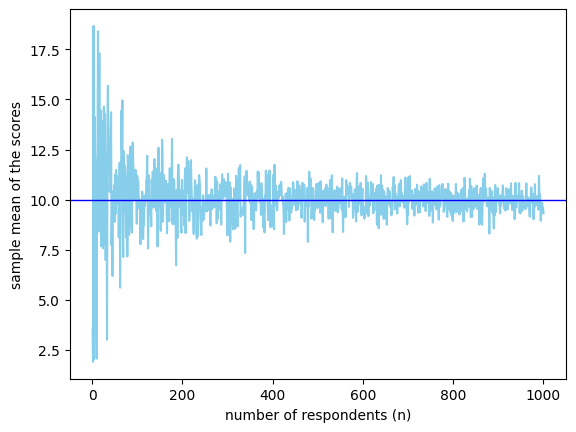

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

np.random.seed(2026)

n = np.arange(1, 1001, 1) # 설문 응답자 수 1~1000
bar_x = np.zeros(len(n)) # 각 n에 대한 표본평균을 저장할 배열

# 평균 10, 표준편차 15인 정규분포에서 응답자 n명의 설문 점수를 무작위로 생성
for i in range(len(n)):
    sample = stats.norm.rvs(loc=10, scale=15, size=n[i])
    bar_x[i] = np.mean(sample)

# 표본평균의 수렴 시각화
plt.plot(n, bar_x, color = 'skyblue')
plt.xlabel('number of respondents (n)')
plt.ylabel('sample mean of the scores')
plt.axhline(y=10, color='blue', linewidth=1)
plt.show()

(큰 수의 법칙 실습 2)

한 기업은 신규 서비스를 출시한 후, 고객을 대상으로 만족도 설문조사를 실시하고 있다. 각 고객은 만족이면 $1$, 불만족이면 $0$으로 응답한다고 하자.  

임의로 선택한 한 명의 고객 응답을 확률변수 $X$라 하면, $X$는 베르누이 분포를 따르며 $P(X=1)=p$이다. 고객들의 응답은 서로 독립이라고 가정한다.

마케팅 팀은 실제 만족 확률이 $p=0.6$이라고 알려진 상황에서, 설문 응답자 수 $n$이 증가할수록 표본평균이 어떠한 값으로 수렴하는지를 확인하고자 한다.

다음 코드는 설문 응답자 수 $n=1,2,\dots,1000$에 대해, 매번 $n$명의 응답을 생성하여 표본평균(만족도 비율)을 계산하고 이를 시각화한 것이다.

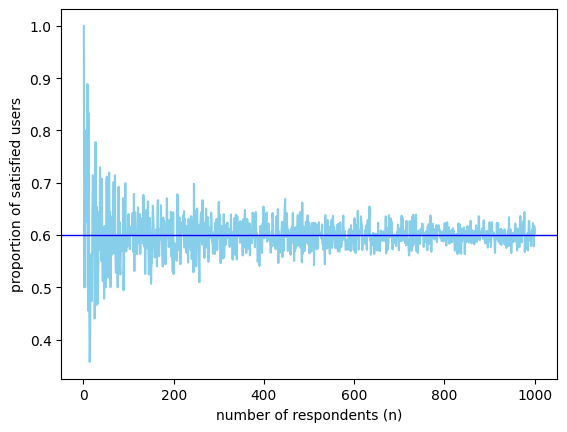

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

np.random.seed(2026)

n = np.arange(1, 1001, 1) # 설문 응답자 수 1~1000
bar_x = np.zeros(len(n))  # 각 n에서의 표본평균(만족 비율) 저장

# 성공확률이 0.6인 베르누이분포에서 응답자 n명의 설문 결과를 무작위로 생성
for i in range(len(n)):
    sample = stats.bernoulli.rvs(p=0.6, size=n[i])
    bar_x[i] = np.mean(sample)

# 표본평균의 수렴 시각화
plt.plot(n, bar_x, color = 'skyblue')
plt.xlabel('number of respondents (n)')
plt.ylabel('proportion of satisfied users')
plt.axhline(y=0.6, color='blue', linewidth=1)
plt.show()

# 3. 중심극한정리(CLT: Central Limit Theorem)

$X_1, X_2, \cdots, X_n$이 평균이 $\mu$이고 분산이 $\sigma^2$인 모집단에서
추출한 랜덤표본이라고 하자.

- $\dfrac{\bar{X}-\mu}{\sigma/\sqrt{n}} \approx N(0,1)$
- $\bar{X} \approx N\!\left(\mu,\dfrac{\sigma^2}{n}\right)$

따라서, 모집단의 분포가 어떤 형태이든지 표본의 크기가 크면 표본평균의 분포를 정규분포로 근사할 수 있다.

(중심극한정리 실습 1)

음악 스트리밍 서비스에서 임의로 한 명의 사용자를 선택했을 때, 그 사용자가 시스템이 추천한 곡을 끝까지 재생하면 $1$, 중간에 종료하면 $0$으로 기록한다고 하자.
이를 확률변수 $X$로 두면, $X$는 다음 분포를 가진다.

$$P(X=1)=0.7, \quad P(X=0)=0.3$$

서로 다른 $n=100$명의 사용자를 무작위로 선택하여 얻은 결과를
$X_1,\dots,X_{100}$이라 하자.

아래의 코드를 이용하면 표본평균 $\bar X = \frac{1}{100} \sum_{i = 1}^{100} X_i$의 경험적 분포가 정규분포에 근사함을 확인 가능하다.

- $n=100$ (사용자 수)
- $B=5000$ (반복 횟수)
- 각 반복에서 $X_1,\dots,X_n$을 생성하고 $\bar{X}$를 계산한다.

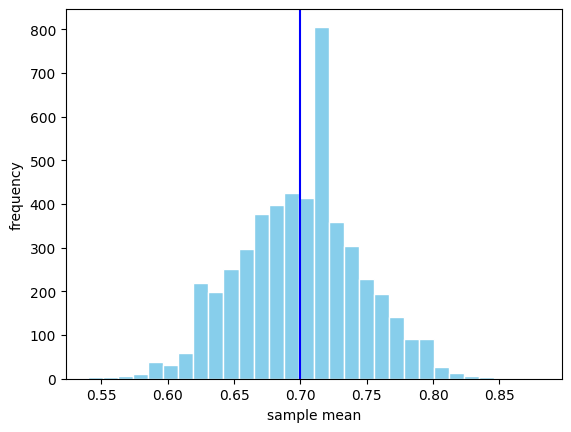

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

np.random.seed(2026)

n = 100 # 사용자 수
B = 5000 # 반복 횟수

bar_x = np.zeros(B)

for b in range(B):
    # 성공 확률이 0.7인 베르누이분포에서 길이 n의 데이터 생성
    sample = stats.binom.rvs(1, 0.7, size=n)
    # 표본평균 계산(곡을 끝까지 재생한 비율)
    bar_x[b] = np.mean(sample)

# 히스토그램 시각화
plt.hist(bar_x, bins=30, edgecolor='white', color = 'skyblue')
plt.xlabel('sample mean')
plt.ylabel('frequency')
plt.axvline(x=0.7, color='blue')
plt.show()

(중심극한정리 실습 2)

이제 사용자 수 $n$이 늘어날수록, 표본평균 $\bar X$의 경험적 분포가 어떻게 달라지는지 확인해보자.

$n \in \{10,100,1000\}$에 대하여, 각 $n$마다 $B=1000$번 반복하여 표본평균 $\bar{X}$를 계산한 뒤 히스토그램을 그려보자.

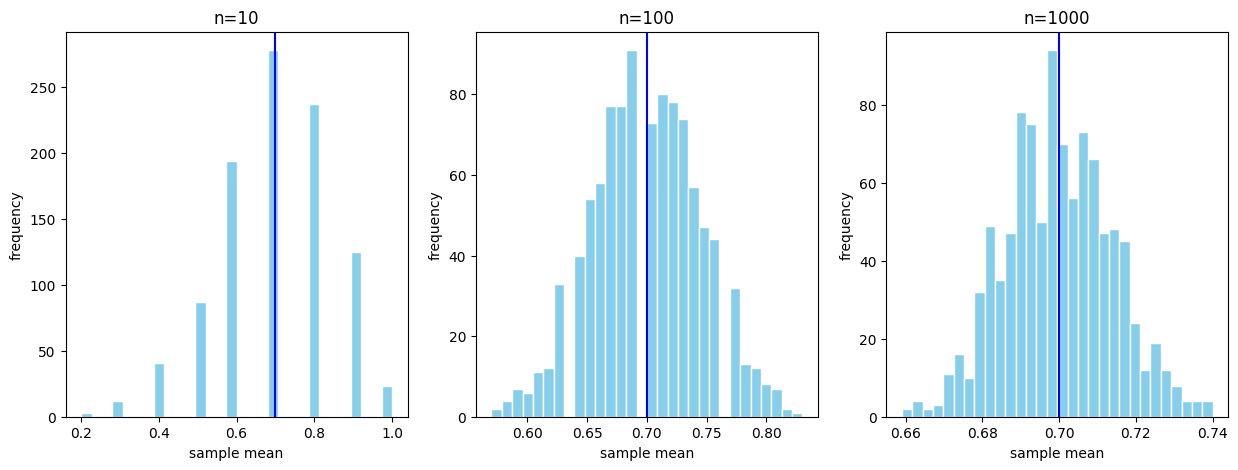

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

np.random.seed(2026)

n_list = [10, 100, 1000] # 사용자 수
B = 1000  # 반복 횟수

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

for i in range(3):
    bar_x = np.zeros(B)
    for b in range(B):
        # 성공 확률이 0.7인 베르누이분포에서 길이 n의 데이터 생성
        sample = stats.binom.rvs(1, 0.7, size=n_list[i])
        # 표본평균 계산(곡을 끝까지 재생한 비율)
        bar_x[b] = np.mean(sample)

    # 개별 히스토그램
    ax[i].hist(bar_x, bins=30, edgecolor='white', color = 'skyblue')
    ax[i].set_xlabel('sample mean')
    ax[i].set_ylabel('frequency')
    ax[i].axvline(x=0.7, color='blue')
    ax[i].set_title('n=' + str(n_list[i]))

plt.show()

(참고) $n$이 커짐에 따라, 표본평균의 분포가 정규분포와 유사해짐을 확인할 수 있다.

# 4. (부록) 2장 혼합분포

- 여러 개의 분포의 선형결합으로 이루어진 분포를 혼합분포라고 한다. 연속확률분포에서는 다음과 같이 표현된다.
$$f(x) = \sum_{i=1}^n w_i f_i(x)$$
- 만약, $f_i(x)$들이 가우시안 확률밀도함수인 경우 $f$를 가우시안 혼합분포라고 한다.

- 이제, $X \sim 0.5 \times N(-10, 10^2) + 0.5 \times N(20, 5^2)$에서 $n = 1000$개의 난수를 생성하고, 히스토그램과 밀도곡선을 그려보자.

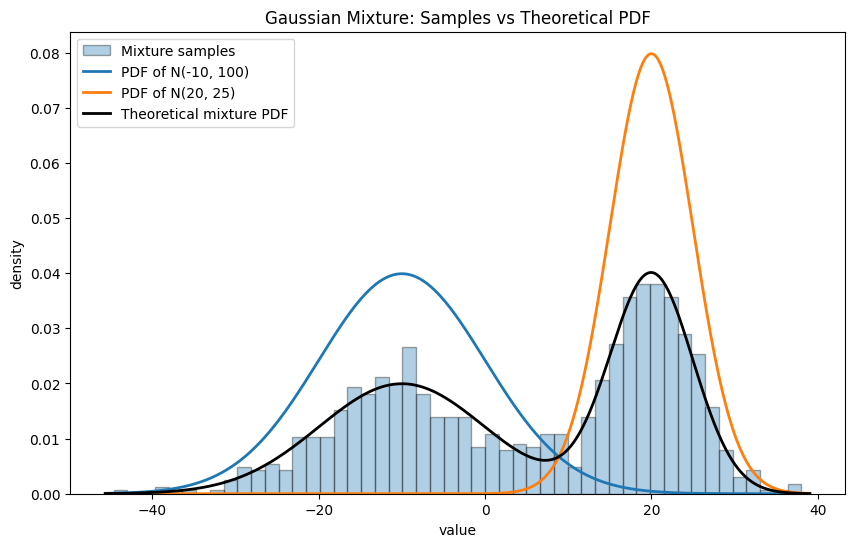

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import pandas as pd
import matplotlib.colors as mcolors

n = 1000
np.random.seed(2026)

# 정규분포 파라미터 및 weight 설정
normal_parameters = np.array([[-10, 10], [20, 5]]) # (mean, std)
num_components = normal_parameters.shape[0]
normal_weights = [0.5, 0.5]

# 어떤 구성원 분포에서 올지 결정
component_indices = np.random.choice(num_components, size=n, p=normal_weights)

# 혼합분포 샘플링
samples1 = np.array([
    norm.rvs(loc=normal_parameters[idx, 0], scale=normal_parameters[idx, 1])
    for idx in component_indices
])

x = np.linspace(samples1.min() - 1, samples1.max() + 1, 1000)

# 구성원 분포별 pdf 계산
component_pdf = np.array([
    norm.pdf(x, loc=normal_parameters[i, 0], scale=normal_parameters[i, 1])
    for i in range(num_components)
])

# 혼합분포 pdf 계산
mixture_pdf = normal_weights[0] * component_pdf[0] + normal_weights[1] * component_pdf[1]

# 시각화
plt.figure(figsize=(10, 6))
plt.hist(samples1, bins=50, density=True, alpha=0.35, edgecolor='black', label='Mixture samples') # 혼합분포에서 샘플 히스토그램

colors = list(mcolors.TABLEAU_COLORS.values())

for i in range(num_components): # 구성원 분포 별 pdf
    plt.plot(x, component_pdf[i], color=colors[i], linewidth=2, label=f'PDF of N({normal_parameters[i,0]}, {normal_parameters[i,1]**2})')

plt.plot(x, mixture_pdf, color='black', linewidth=2, label='Theoretical mixture PDF') # 혼합분포 pdf

plt.title('Gaussian Mixture: Samples vs Theoretical PDF')
plt.xlabel('value')
plt.ylabel('density')
plt.legend()
plt.show()

- 위의 방법에서는 `np.random.choice`를 이용해 혼합분포 가중치에 따라 각 관측치가 어느 정규분포에서 생성될지를 직접 선택하였다.  

- 아래의 방법에서는 베르누이 확률변수를 도입하여 두 구성원 분포 중 하나를 선택하는데, 두 방법은 구성원 분포가 2개인 경우 동일하다.

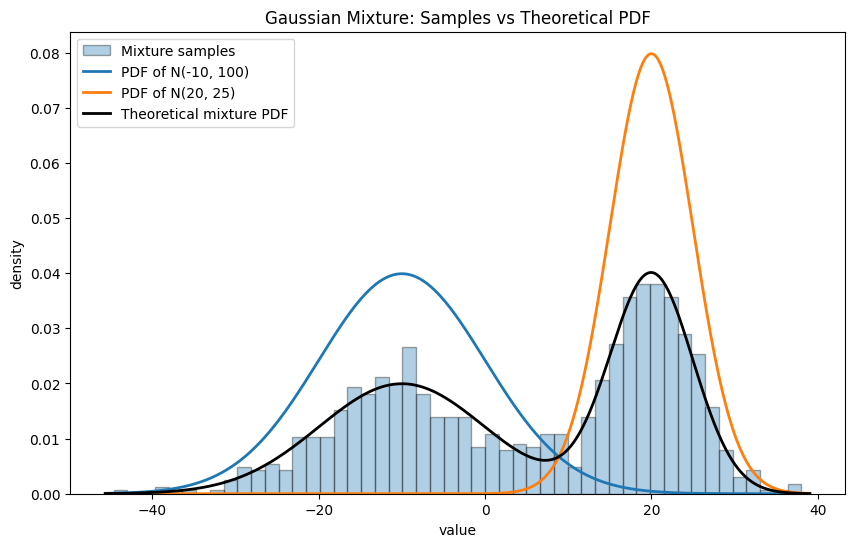

In [19]:
n = 1000
np.random.seed(2026)

# 정규분포 파라미터 및 weight 설정
normal_parameters = np.array([[-10, 10], [20, 5]])  # (mean, std)
w = 0.5 # P(구성원 분포 = 1)

# Bernoulli로 구성원 분포 결정: 0 또는 1
component_indices = np.random.binomial(n=1, p=w, size=n)

# 구성원 분포에 따라 정규분포에서 샘플링
mu = normal_parameters[component_indices, 0]
sd = normal_parameters[component_indices, 1]
samples2 = np.random.normal(loc=mu, scale=sd, size=n)

x = np.linspace(samples2.min() - 1, samples2.max() + 1, 1000)

# 구성원 분포별 pdf 계산
component_pdf = np.array([
    norm.pdf(x, loc=normal_parameters[i, 0], scale=normal_parameters[i, 1])
    for i in range(num_components)
])

# 혼합분포 pdf 계산
mixture_pdf = normal_weights[0] * component_pdf[0] + normal_weights[1] * component_pdf[1]

# 시각화
plt.figure(figsize=(10, 6))
plt.hist(samples2, bins=50, density=True, alpha=0.35, edgecolor='black', label='Mixture samples') # 혼합분포에서 샘플 히스토그램

colors = list(mcolors.TABLEAU_COLORS.values())

for i in range(num_components): # 구성원 분포 별 pdf
    plt.plot(x, component_pdf[i], color=colors[i], linewidth=2, label=f'PDF of N({normal_parameters[i,0]}, {normal_parameters[i,1]**2})')

plt.plot(x, mixture_pdf, color='black', linewidth=2, label='Theoretical mixture PDF') # 혼합분포 pdf

plt.title('Gaussian Mixture: Samples vs Theoretical PDF')
plt.xlabel('value')
plt.ylabel('density')
plt.legend()
plt.show()